In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

1.	Data Preparation

In [3]:
# o	Load the CSV file using pandas.
df = pd.read_csv("retail_sales_copy.csv")


In [4]:
df.head()

,OrderID,OrderDate,CustomerID,Region,Category,SubCategory,Product,Quantity,UnitPrice,Sales,Profit
0,1001,13-04-2023,CUST436,North,Furniture,Tables,Table B,8,705,5640,955.25
1,1002,02-05-2023,CUST467,North,Furniture,Chairs,Chair C,7,335,2345,332.64
2,1003,10-04-2023,CUST360,West,Furniture,Chairs,Chair C,8,135,1080,58.45
3,1004,15-09-2023,CUST344,North,Technology,Accessories,Accessory B,6,390,2340,202.09
4,1005,04-10-2023,CUST161,East,OfficeSupplies,Paper,Paper A,6,257,1542,210.31


In [5]:
# o	Find out the Number of Rows, Columns & data types
df.shape

(3000, 11)

In [6]:
# o	Check missing values, datatypes, duplicates.
df.info()
df.duplicated().sum()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OrderID      3000 non-null   int64  
 1   OrderDate    3000 non-null   object 
 2   CustomerID   3000 non-null   object 
 3   Region       3000 non-null   object 
 4   Category     3000 non-null   object 
 5   SubCategory  3000 non-null   object 
 6   Product      3000 non-null   object 
 7   Quantity     3000 non-null   int64  
 8   UnitPrice    3000 non-null   int64  
 9   Sales        3000 non-null   int64  
 10  Profit       3000 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 257.9+ KB


OrderID        0
OrderDate      0
CustomerID     0
Region         0
Category       0
SubCategory    0
Product        0
Quantity       0
UnitPrice      0
Sales          0
Profit         0
dtype: int64

In [7]:
# o	Do Describe of the data & record your inference
df.describe().T

,count,mean,std,min,25%,50%,75%,max
OrderID,3000.0,2500.500000,866.169729,1001.0,1750.750,2500.50,3250.2500,4000.00
Quantity,3000.0,4.953000,2.610695,1.0,3.000,5.00,7.0000,9.00
UnitPrice,3000.0,508.242000,283.832273,5.0,261.750,514.50,755.2500,999.00
Sales,3000.0,2498.235333,2039.070073,7.0,816.000,1960.00,3736.0000,8973.00
Profit,3000.0,372.213867,354.070489,1.0,109.015,256.25,525.7225,2213.76


In [8]:
# o	Convert OrderDate into datetime, extract Year/Month.
df["OrderDate"] = pd.to_datetime(df["OrderDate"], format="%d-%m-%Y")

df["Year"] = df["OrderDate"].dt.year
df["Month"] = df["OrderDate"].dt.month



In [9]:
# (df["UnitPrice"] * df["Quantity"] == df["Sales"]).all()
df.head()

,OrderID,OrderDate,CustomerID,Region,Category,SubCategory,Product,Quantity,UnitPrice,Sales,Profit,Year,Month
0,1001,2023-04-13,CUST436,North,Furniture,Tables,Table B,8,705,5640,955.25,2023,4
1,1002,2023-05-02,CUST467,North,Furniture,Chairs,Chair C,7,335,2345,332.64,2023,5
2,1003,2023-04-10,CUST360,West,Furniture,Chairs,Chair C,8,135,1080,58.45,2023,4
3,1004,2023-09-15,CUST344,North,Technology,Accessories,Accessory B,6,390,2340,202.09,2023,9
4,1005,2023-10-04,CUST161,East,OfficeSupplies,Paper,Paper A,6,257,1542,210.31,2023,10


2.	Univariate Analysis

Sales Distribution


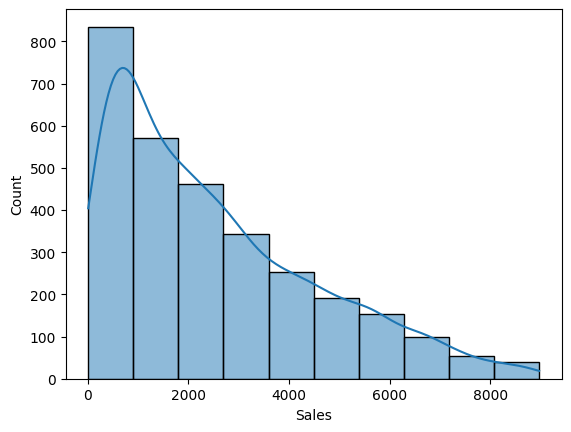

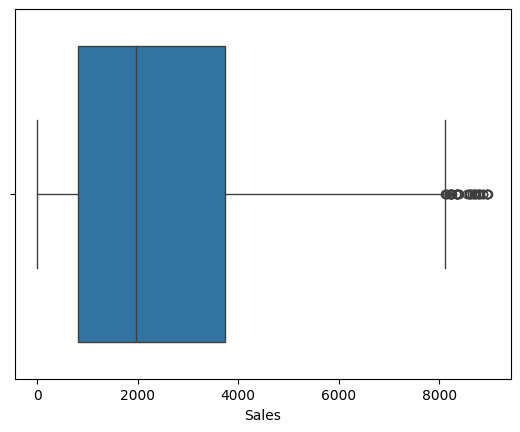

Profit Distribution


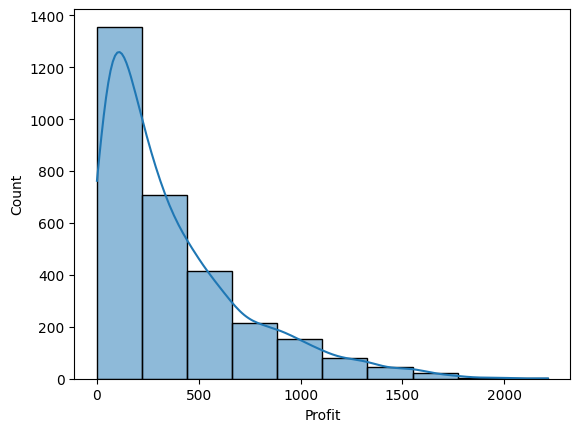

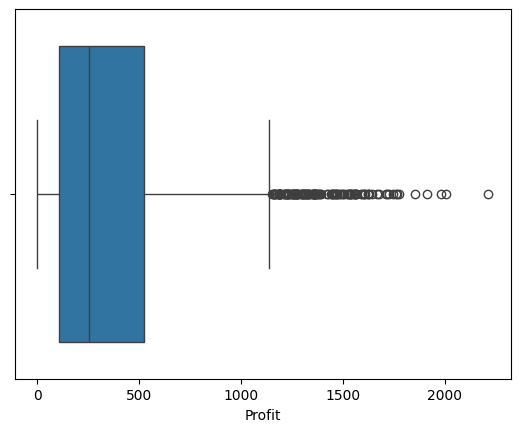

Quantity Distribution


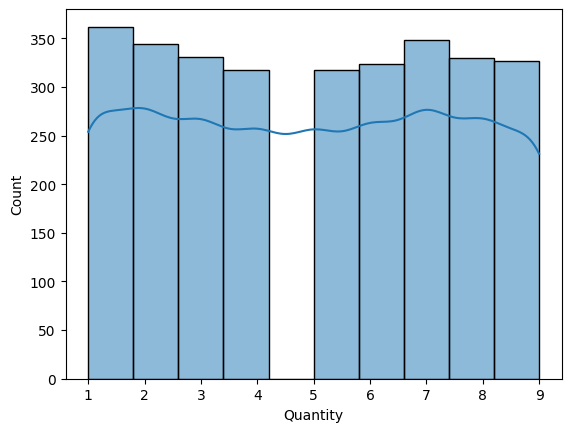

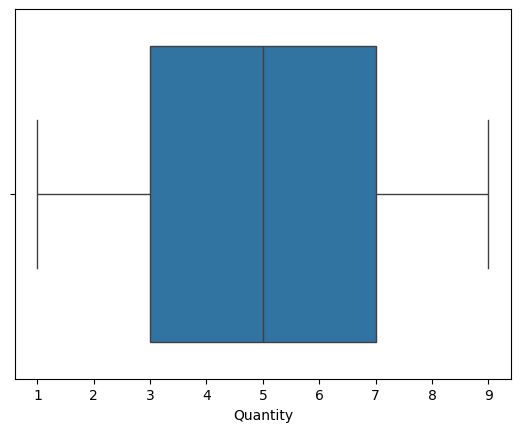

In [10]:
# o	Distribution of Sales, Profit, Quantity.
# Distribution of Sales
print("Sales Distribution")
sns.histplot(df["Sales"], bins=10, kde=True)
plt.show()
sns.boxplot(x= df["Sales"])
plt.show()
# Distribution of Profit
print("Profit Distribution")
sns.histplot(df["Profit"], bins=10, kde=True)
plt.show()
sns.boxplot(x= df["Profit"])
plt.show()
# Distribution of Quantity
print("Quantity Distribution")
sns.histplot(df["Quantity"], bins=10, kde=True)
plt.show()
sns.boxplot(x= df["Quantity"])
plt.show()

In [11]:
# o	Find the Most frequent categories/subcategories.
mostFrequentCategory = df["Category"].mode()
print("Most Frequent Category",mostFrequentCategory)
mostFrequentSubCategory = df["SubCategory"].mode()
print("Most Frequent SubCategory",mostFrequentSubCategory)


Most Frequent Category 0    Furniture
Name: Category, dtype: object
Most Frequent SubCategory 0    Chairs
Name: SubCategory, dtype: object


3.	Bivariate Analysis

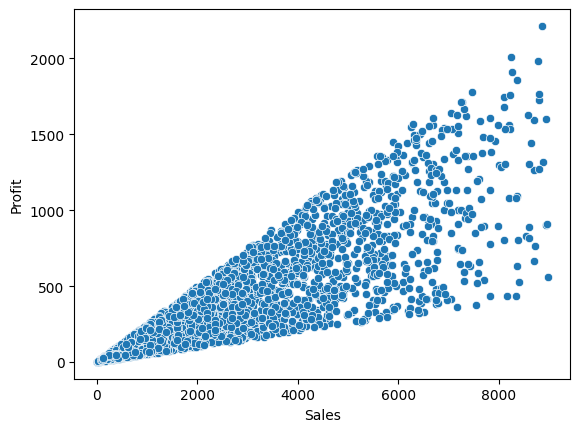

In [12]:
# o	Compare Sales vs Profit (scatterplot).
sns.scatterplot(x= df["Sales"], y = df["Profit"])
plt.show()

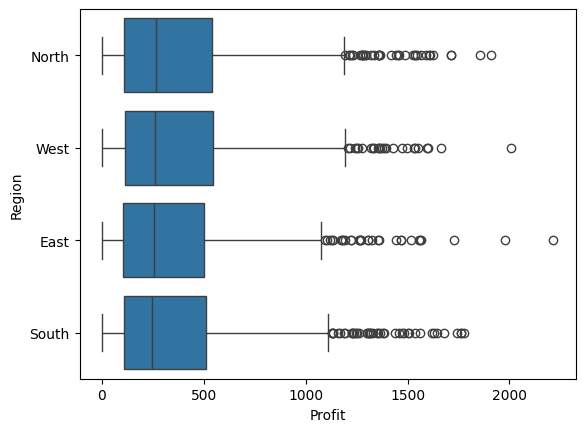

In [13]:
# o	Boxplot: Profit by Region.
sns.boxplot(x=df["Profit"], y=df["Region"])
plt.show()

    Month   Sales
0       1  623691
1       2  619136
2       3  588829
3       4  648805
4       5  704472
5       6  560443
6       7  683232
7       8  636074
8       9  643423
9      10  556354
10     11  636250
11     12  593997


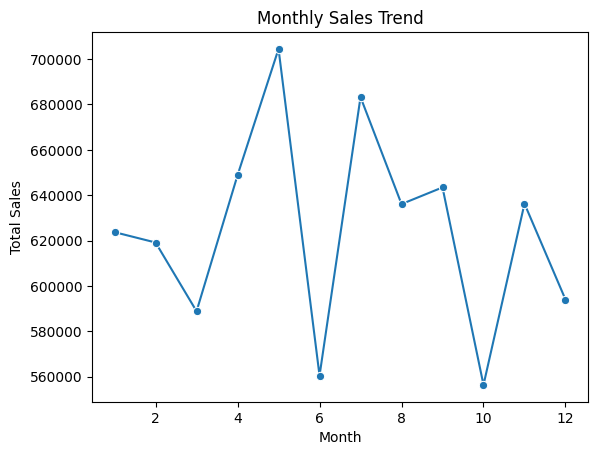

In [14]:
# o	Lineplot: Monthly sales trend.
df.head(10)
# sns.lineplot(x='Sales', y='Month', data=df)
df_grouped = df.groupby("Month", as_index=False)["Sales"].sum()
print(df_grouped)
sns.lineplot(x="Month", y="Sales", data=df_grouped, marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


4.	Multivariate Analysis

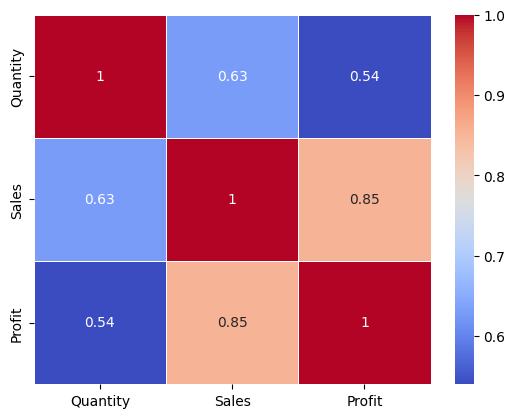

In [15]:
# o	Heatmap of correlation between numeric variables (Quantity, Sales, Profit).
numerical_columns = df[['Quantity', 'Sales', 'Profit']]
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()


Category  Furniture  OfficeSupplies  Technology
Region                                         
East         634499          599852      606494
North        731966          620192      609580
South        641478          602028      594613
West         680064          623119      550821


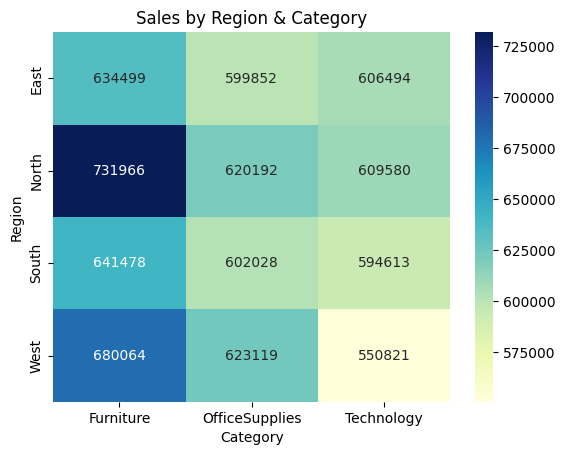

In [16]:
# # o	Grouped analysis: Sales by Region & Category (pivot + heatmap).
# Pivot: Region vs Category with Sales
pivot_table = df.pivot_table(
    values="Sales",
    index="Region",
    columns="Category",
    aggfunc="sum",
    fill_value=0
)

print(pivot_table)

# Heatmap of pivoted data
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Sales by Region & Category")
plt.show()


5.	Business Questions to Answer

In [17]:
# o	Understand sales distribution: Which product categories are most profitable?

profit_by_category = df.groupby("Category")["Profit"].sum()
print(profit_by_category)
profit_by_subcategory = df.groupby("SubCategory")["Profit"].sum()
print(profit_by_subcategory)
total_profit = df["Profit"].sum()
print("Total Profit:", total_profit)

# Furniture Profit is Higher


Category
Furniture         404251.04
OfficeSupplies    362634.69
Technology        349755.87
Name: Profit, dtype: float64
SubCategory
Accessories    103763.85
Art            111153.34
Binders        126782.52
Bookcases      129585.86
Chairs         132908.81
Laptops        117931.45
Paper          124698.83
Phones         128060.57
Tables         141756.37
Name: Profit, dtype: float64
Total Profit: 1116641.6


    Month   Sales
0       1  623691
1       2  619136
2       3  588829
3       4  648805
4       5  704472
5       6  560443
6       7  683232
7       8  636074
8       9  643423
9      10  556354
10     11  636250
11     12  593997


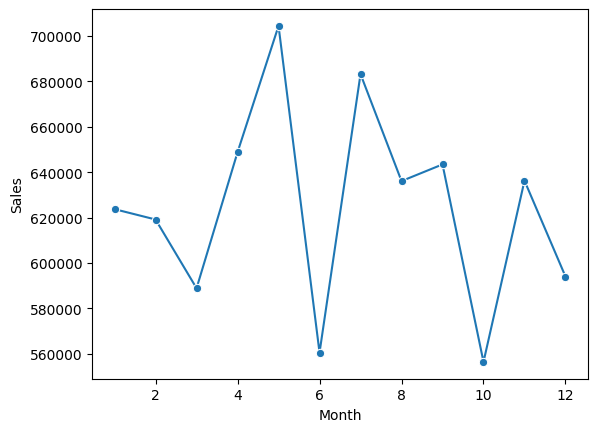

In [18]:
# o	Seasonal trends: Which months show seasonal spikes in sales?
sales_by_month = df.groupby("Month", as_index=False)["Sales"].sum()
print(sales_by_month)
sns.lineplot(x="Month", y="Sales", data=df_grouped, marker="o")

plt.show()

In [19]:
# o	Regional performance: Which region performs best in terms of sales?

sales_by_region = df.groupby("Region")["Sales"].sum()
print(sales_by_region)

sales_by_region = df.groupby("Region")["Profit"].sum()
print(sales_by_region)

# Sales in North Region is Higher

Region
East     1840845
North    1961738
South    1838119
West     1854004
Name: Sales, dtype: int64
Region
East     266883.24
North    291369.41
South    279152.36
West     279236.59
Name: Profit, dtype: float64


o	Profitability insights: Are higher sales always leading to higher profits?

Yes, The Sale in the North is higher than other region also comparing with higher profit north moves top

In [20]:
# o	Customer trends: Identify frequent customers and their contribution to revenue.

df["CustomerID"].value_counts().head(20)

CustomerID
CUST029    15
CUST059    14
CUST293    13
CUST434    12
CUST104    12
CUST408    11
CUST439    11
CUST047    11
CUST336    11
CUST472    11
CUST334    11
CUST107    11
CUST435    11
CUST234    11
CUST181    11
CUST320    11
CUST344    11
CUST063    11
CUST441    11
CUST143    11
Name: count, dtype: int64

In [21]:
customer_revenue = df.groupby("CustomerID")["Sales"].sum().sort_values(ascending=False).head(20)
print(customer_revenue)


CustomerID
CUST472    45505
CUST439    40263
CUST343    39751
CUST059    37680
CUST353    35517
CUST321    35303
CUST434    34919
CUST226    33408
CUST408    33236
CUST409    32429
CUST180    32283
CUST101    32000
CUST220    31961
CUST010    31931
CUST308    31858
CUST047    31733
CUST435    31359
CUST428    31052
CUST120    30771
CUST334    30442
Name: Sales, dtype: int64


In [22]:
CUST029Data = df.loc[df["CustomerID"] == "CUST029"]
print(CUST029Data)
totalSalesCUST029Data = CUST029Data["Sales"].sum()
print("Total Sale",totalSalesCUST029Data) 




      OrderID  OrderDate CustomerID Region        Category  SubCategory  \
119      1120 2023-01-05    CUST029  South       Furniture       Chairs   
218      1219 2023-02-20    CUST029  South  OfficeSupplies      Binders   
329      1330 2023-01-07    CUST029  North      Technology  Accessories   
489      1490 2023-02-17    CUST029  North      Technology       Phones   
904      1905 2023-07-26    CUST029   East  OfficeSupplies      Binders   
1190     2191 2023-09-04    CUST029  North  OfficeSupplies      Binders   
1632     2633 2023-03-04    CUST029  North      Technology      Laptops   
1868     2869 2023-04-11    CUST029   West  OfficeSupplies          Art   
2103     3104 2023-11-04    CUST029   West       Furniture       Chairs   
2193     3194 2023-07-24    CUST029  North  OfficeSupplies        Paper   
2201     3202 2023-06-07    CUST029  North  OfficeSupplies      Binders   
2341     3342 2023-10-30    CUST029   East      Technology       Phones   
2378     3379 2023-01-27 

In [23]:
pivot_table_MonthlySales = df.pivot_table(
    values="Sales",
    index="Month",
    columns="Category",
    aggfunc="sum",
    fill_value=0
)

print(pivot_table_MonthlySales)

Category  Furniture  OfficeSupplies  Technology
Month                                          
1            198467          251455      173769
2            244957          203106      171073
3            205529          204365      178935
4            213735          202997      232073
5            241015          232506      230951
6            179942          216672      163829
7            249341          249624      184267
8            249861          165899      220314
9            226118          205469      211836
10           210882          155018      190454
11           257363          172144      206743
12           210797          185936      197264


In [24]:
# qty5 = (df["Quantity"] == 5).all()
# print(qty5)
# furniture_count = (df["Category"]  == "Furniture").value_counts()
# print(furniture_count)
df["Category"].value_counts()


Category
Furniture         1047
OfficeSupplies    1009
Technology         944
Name: count, dtype: int64